In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

<b><font size="7" color="red">ch12. 데이터시각화</font></b>
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도시각화)
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib기반으로 다양한 색, 테마, 챠트 기능. groupby 기능을 추가한 라이브러리
# 1절 matplotlib
- https://pypi.org/project/matplotlib/ 
- https://matplotlib.org/stable/api/pyplot_summary.html
## 1.1 패키지 import 및 기본 설정

In [2]:
import matplotlib
matplotlib.__version__

'3.7.0'

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 한글설정(windows mac)

# warning 안보이게
import warnings
warnings.filterwarnings(action='ignore') # warning 안 보이게

## 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1) 데이터 준비 <br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장<br>

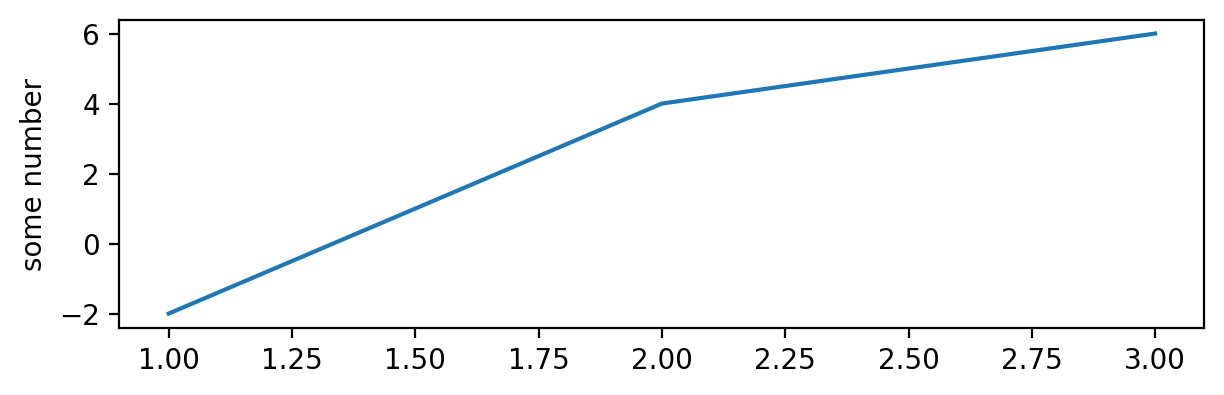

In [7]:
x = [1, 2, 3] #1)
y = [-2, 4, 6]
plt.figure(figsize=(7, 2)) # 2)그래프 객체 생성 사이즈는 인치
plt.plot(x, y)  # 3)
plt.ylabel('some number') # 4)커스터마이징
# plt.show() # 5) 출력
plt.savefig('data/ch12.png', bbox_inches='tight') # 파일 출력

## 1.3 그래프 영역 나누기
### 1) subplot()함수로 서브플롯 추가

In [11]:
import numpy as np
x = np.arange(0, 10, 0.1) # np.linspace(0, 9.9, 100)
x.shape

(100,)

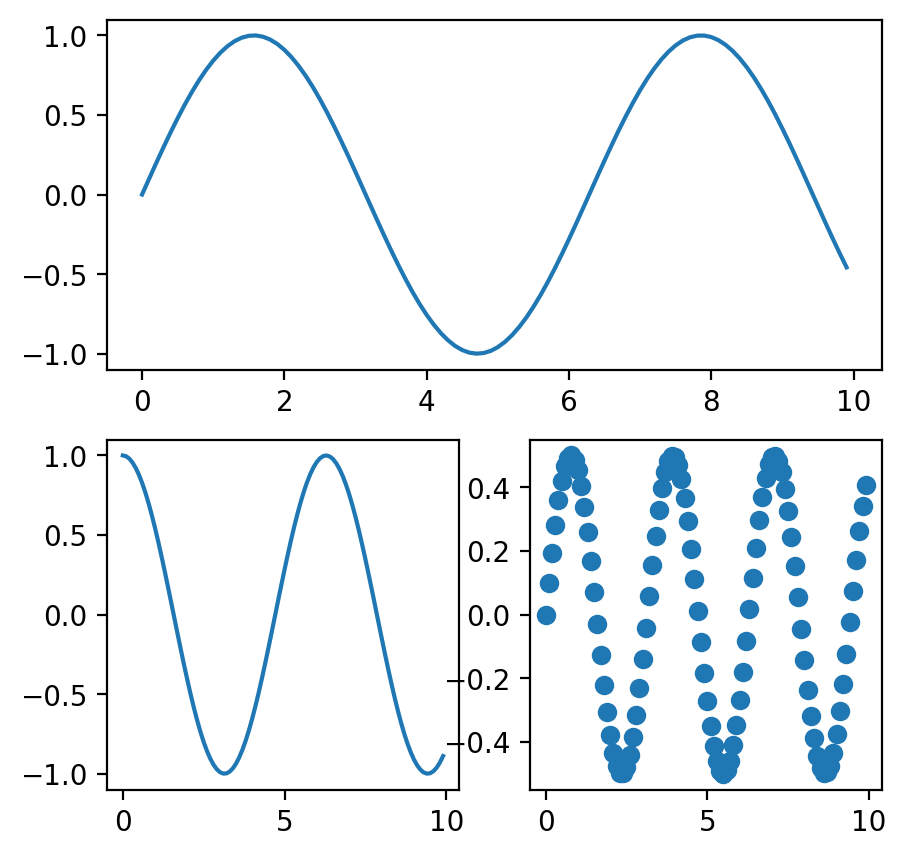

In [15]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1) # 2행1열로 subplot에서 1번째 subplot은 다음과 같이 그린다
plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3) # 2행2열 subplot중 3번째 subplot
plt.plot(x, np.cos(x))
plt.subplot(224) # 2행2열 subplot 중 4번째 subplot
plt.scatter(x, np.sin(x)*np.cos(x))
plt.show()

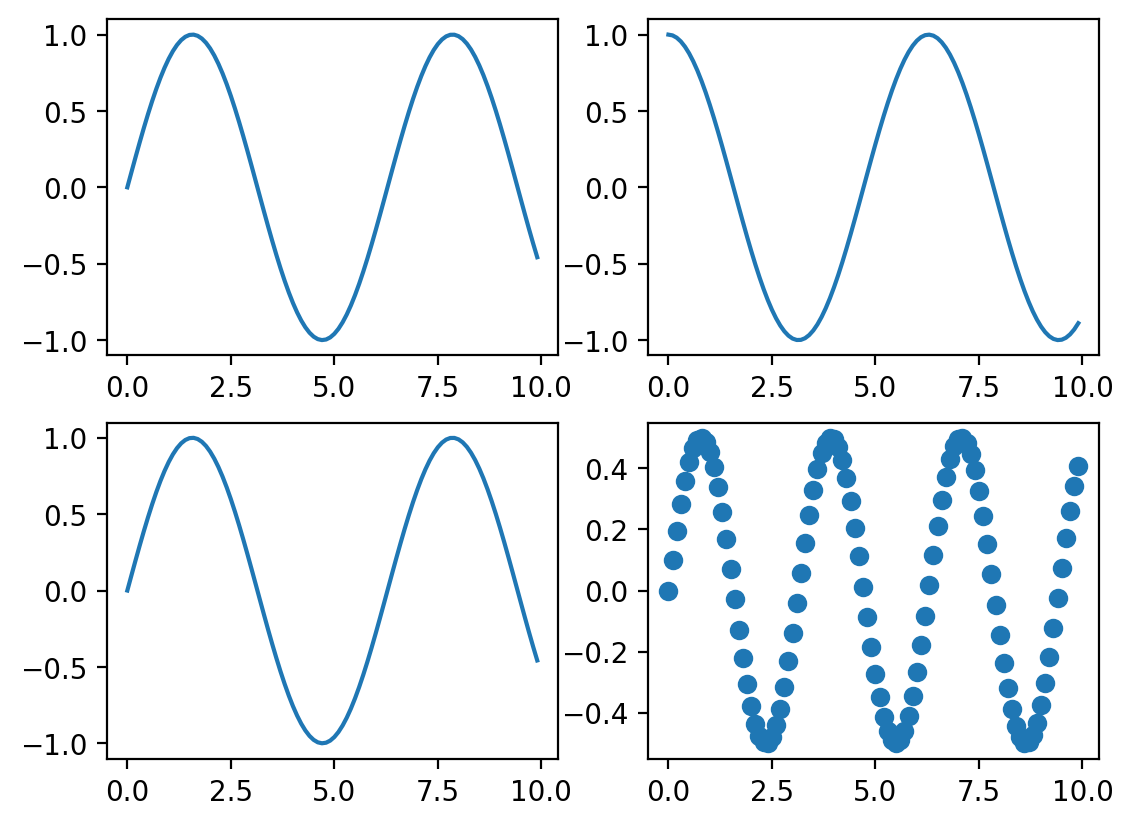

In [17]:
plt.subplot(2, 2, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2); plt.plot(x, np.cos(x))
plt.subplot(2, 2, 3); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 4); plt.scatter(x, np.sin(x)*np.cos(x))
plt.show()

### 2) subplots()함수로 서브플롯 추가
- plot함수에 색상이나 스타일 조정(교안 14page) https://wikidocs.net/92085

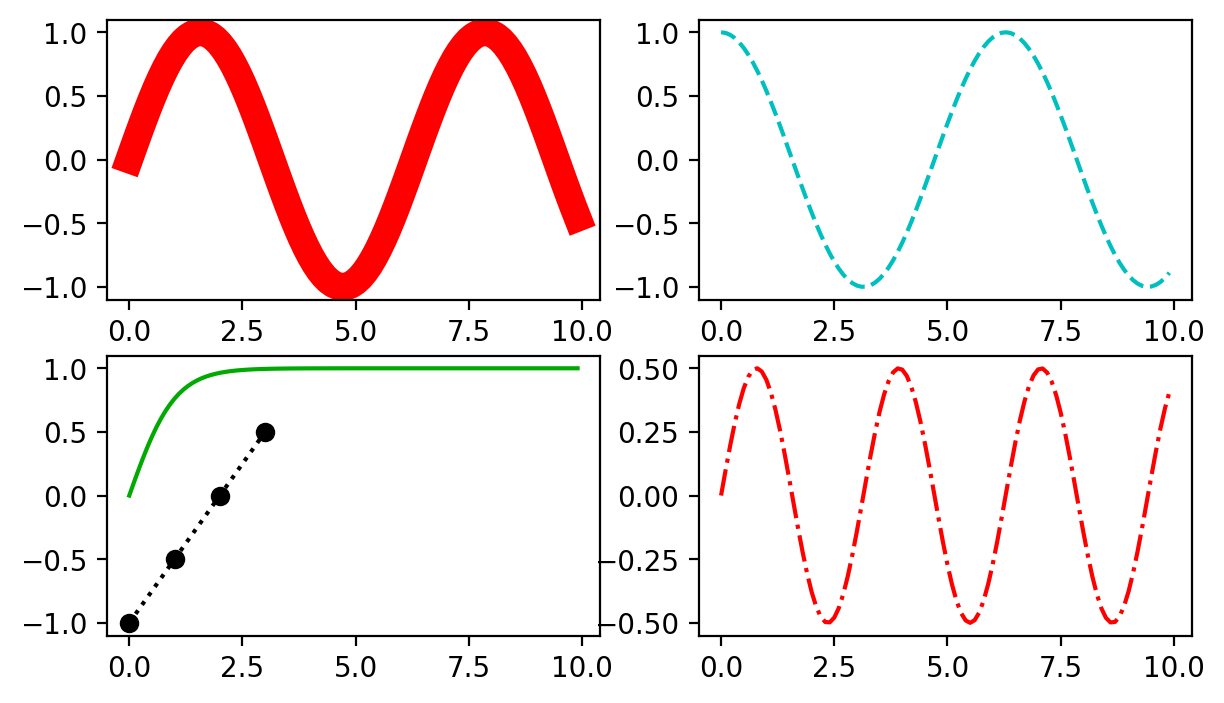

In [41]:
# 2행2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x), c='r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c--') #c='c', linestyle='--'
axes[1,0].plot(x, np.tanh(x), '#00AA00')
axes[1,0].plot([0,1,2,3],[-1, -0.5, 0, 0.5], 'ko:')# k:black, marker='o', linestyle=':'
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r-.')
plt.show()

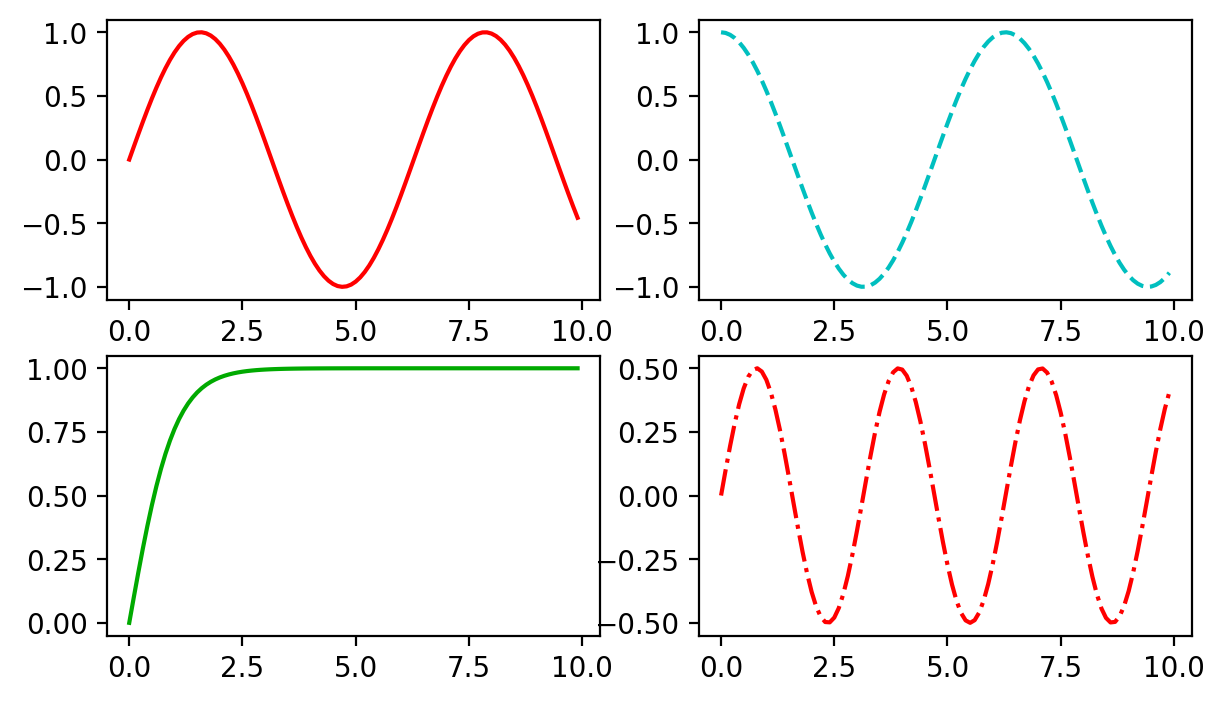

In [45]:
# 2행2열 서브플롯(for)
func = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)]
fmt  = ['r', 'c--', '#00AA00', 'r-.']
fig, axes = plt.subplots(2, 2, figsize=(7,4))
list(enumerate(axes.flat))
for i, ax in enumerate(axes.flat):
    ax.plot(x, func[i](x), fmt[i])

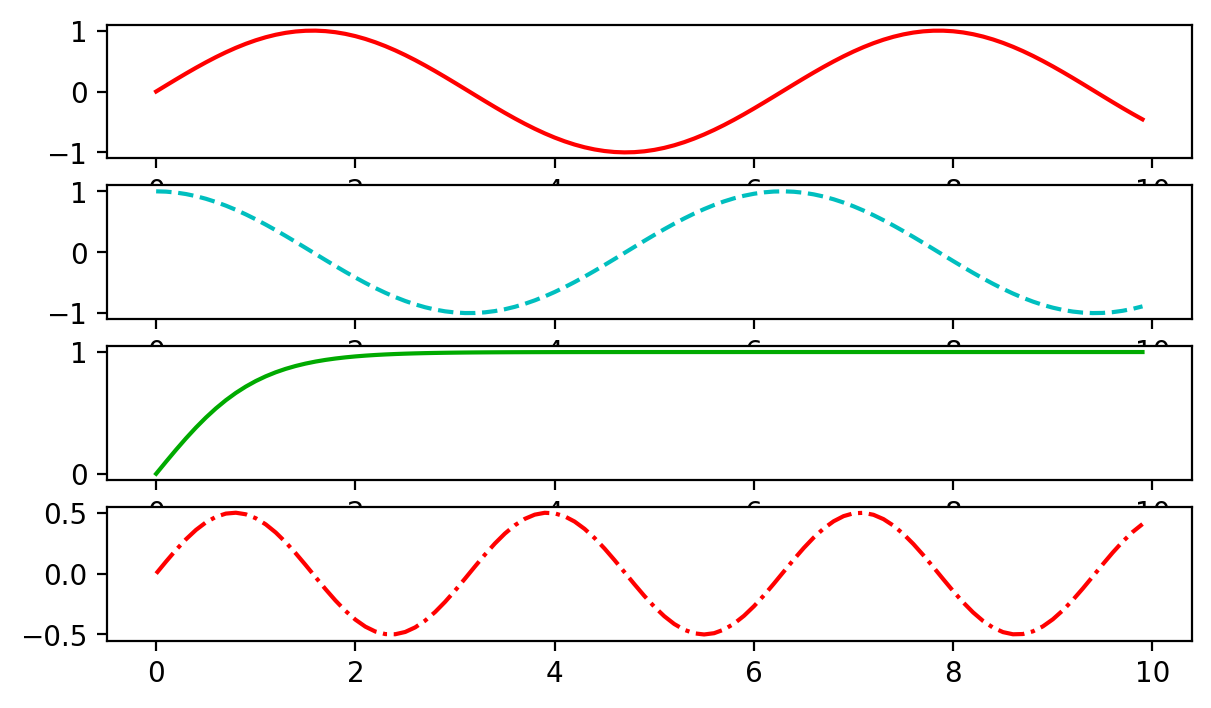

In [46]:
# 4행1열 서브플롯(for)
func = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)]
fmt  = ['r', 'c--', '#00AA00', 'r-.']
fig, axes = plt.subplots(4, 1, figsize=(7,4))

for i, ax in enumerate(axes):
    ax.plot(x, func[i](x), fmt[i])

## 1.4 다양한 그래프 그리기
### 1) pyplot 함수들(교안 16page) : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html

### 2)  matplotlib.pyplot.plot() : 선그래프

### 3) pandas.DataFrame.plot()
- plt.____(x, y, fmt)
- df.plot(x=None, y=None, kind='line', figsize=None, title=None, grid=None)
    * kind : line(기본값), scatter(점도표), bar, barh, density, hist, pie(한컬럼만)....

In [4]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica


- 교안(20page) https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용

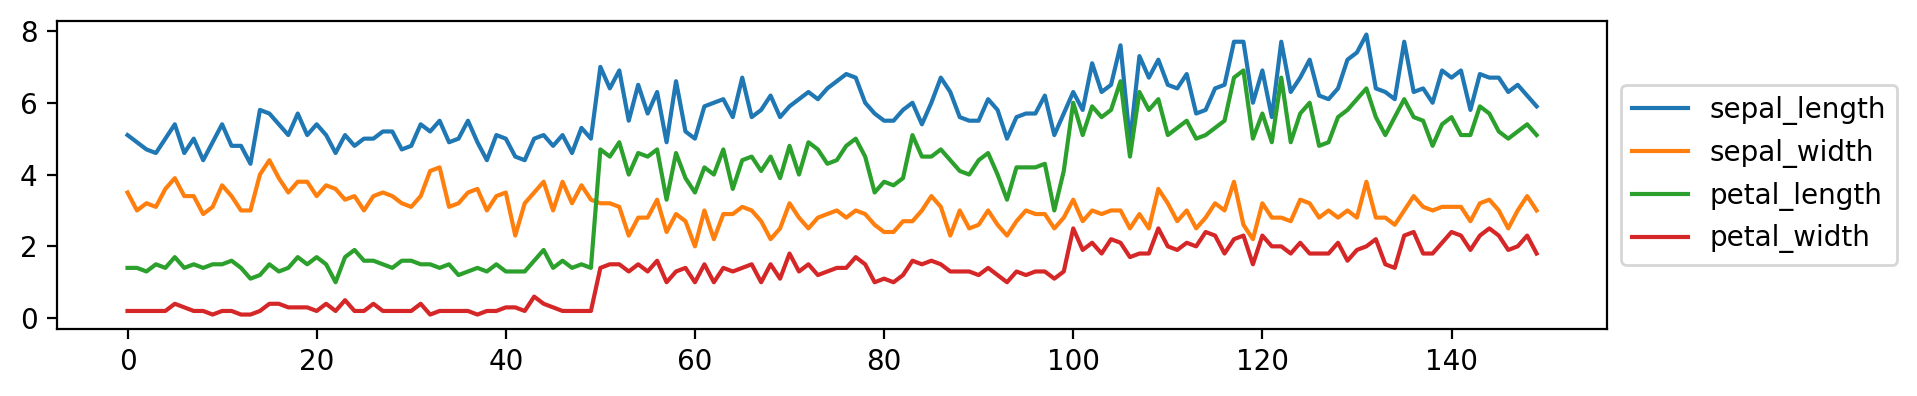

In [18]:
# plt.figure(figsize=(8, 2))
# plt.plot(iris.index, iris.iloc[:,:-1])
ax = iris.plot(kind='line', figsize=(10, 2))
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- 교안21page : https://matplotlib.org/stable/tutorials/colors/colormaps.html (colormap)

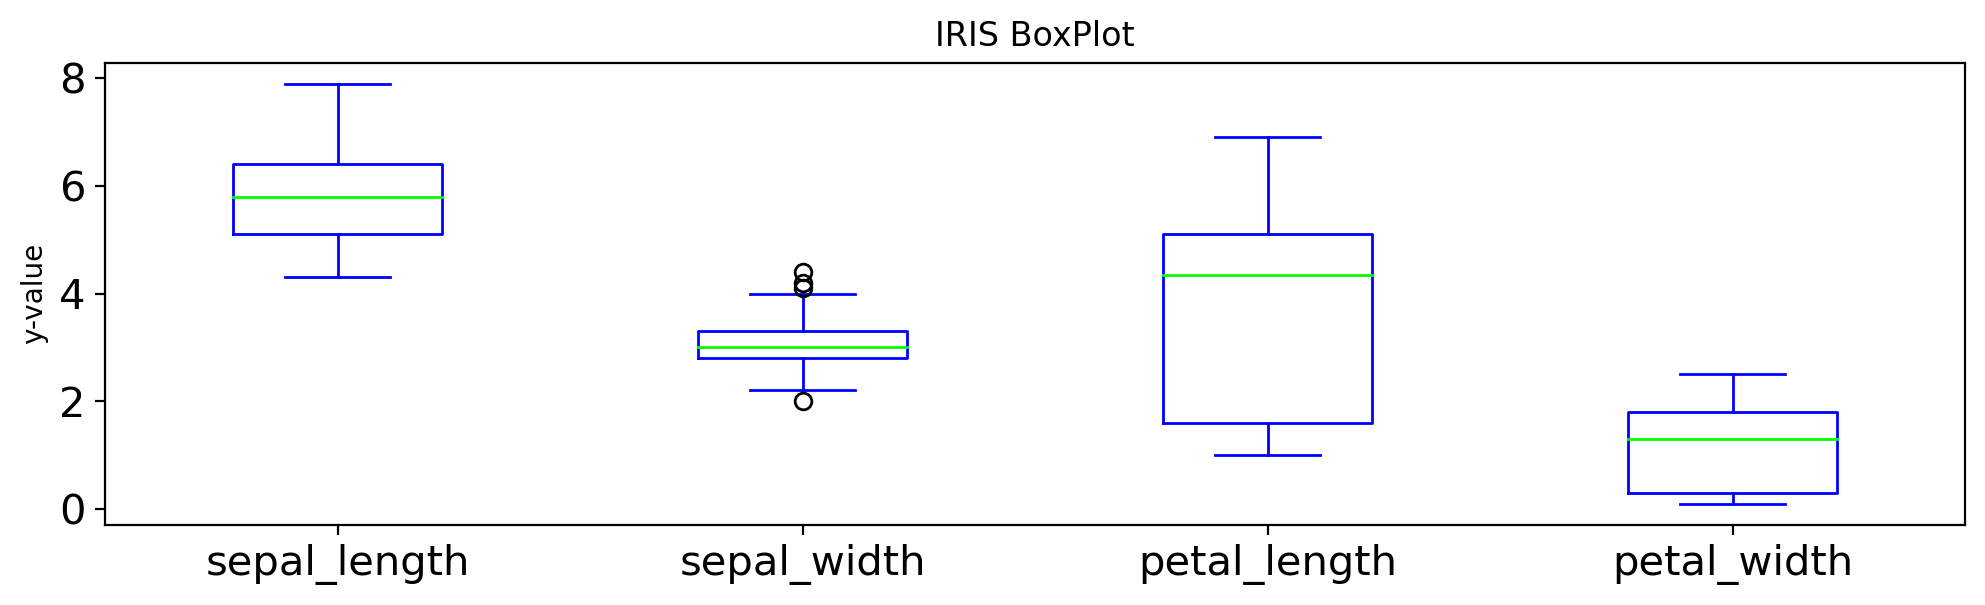

In [27]:
iris.plot(kind='box', figsize=(12,3), title='IRIS BoxPlot',
         ylabel='y-value', fontsize=15, colormap='brg')
plt.show()

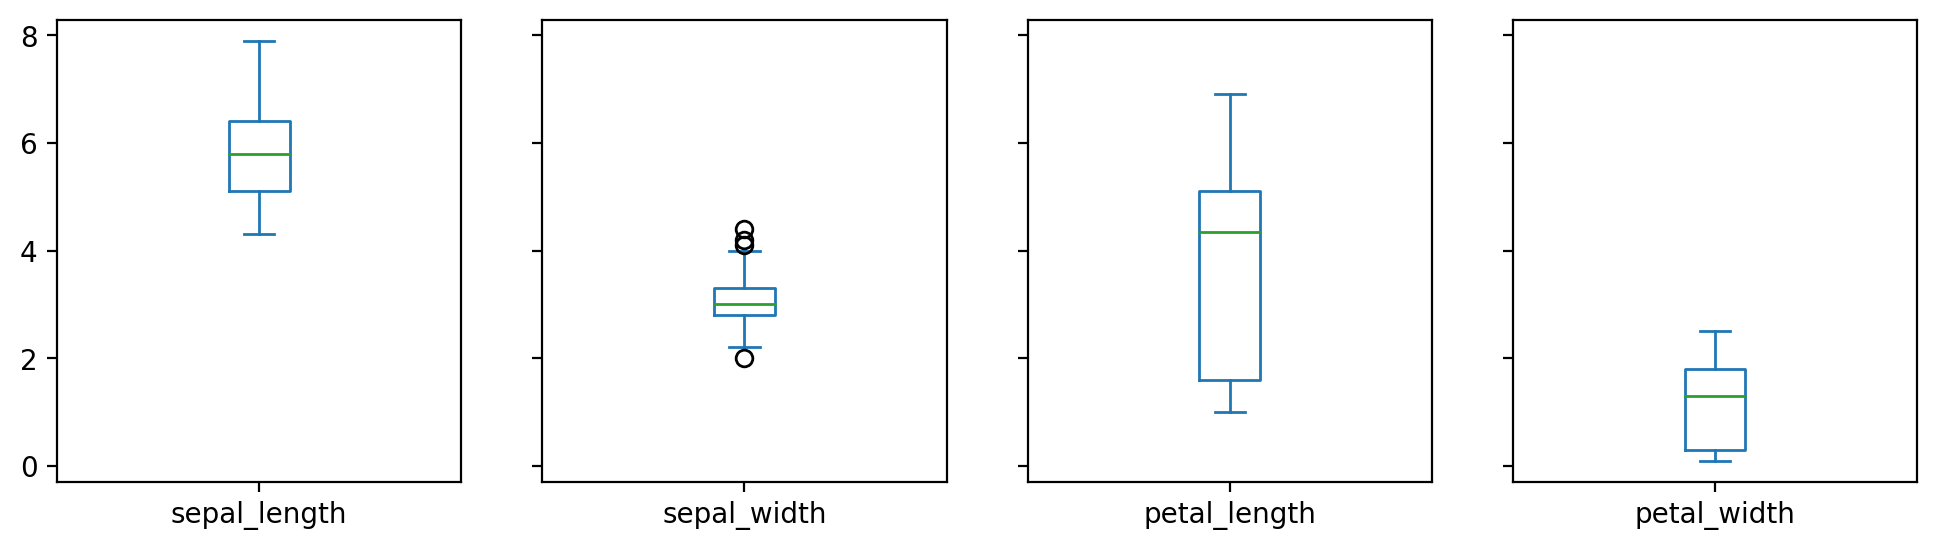

In [31]:
iris.plot(kind='box', figsize=(12,3), subplots=True, sharey=True)
plt.show()